<a href="https://colab.research.google.com/github/yms0606/SecuLayer/blob/main/2022%20UOS%20%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/2022_UOS_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('/content/drive/MyDrive/ML study/UOS/train.csv')

In [23]:
df.head()

,일시,광진구,동대문구,성동구,중랑구
0,20180101,0.592,0.368,0.580,0.162
1,20180102,0.840,0.614,1.034,0.260
2,20180103,0.828,0.576,0.952,0.288
3,20180104,0.792,0.542,0.914,0.292
4,20180105,0.818,0.602,0.994,0.308


In [24]:
df['일시'] = df['일시'].astype('str')
df['일시'] = pd.to_datetime(df['일시'])

In [25]:
df_광진구 = df.drop(['동대문구','성동구','중랑구'],axis=1)
df_동대문구 = df.drop(['광진구','성동구','중랑구'],axis=1)
df_성동구 = df.drop(['동대문구','광진구','중랑구'],axis=1)
df_중랑구 = df.drop(['동대문구','성동구','광진구'],axis=1)

In [26]:
df_광진구.columns = ['ds','y']
df_동대문구.columns = ['ds','y']
df_성동구.columns = ['ds','y']
df_중랑구.columns = ['ds','y']

In [27]:
m_광진구 = Prophet(seasonality_mode= 'multiplicative',
                changepoint_prior_scale=0.1,
                yearly_seasonality=20,
                weekly_seasonality=20,
                daily_seasonality=20
                )
m_동대문구 = Prophet(seasonality_mode= 'multiplicative',
                changepoint_prior_scale=0.1,
                yearly_seasonality=20,
                weekly_seasonality=20,
                daily_seasonality=20
                )
m_성동구 = Prophet(seasonality_mode= 'multiplicative',
                changepoint_prior_scale=0.1,
                yearly_seasonality=20,
                weekly_seasonality=20,
                daily_seasonality=20
                )
m_중랑구 = Prophet(seasonality_mode= 'multiplicative',
                changepoint_prior_scale=0.1,
                yearly_seasonality=20,
                weekly_seasonality=20,
                daily_seasonality=20
                )

In [28]:
m_광진구.fit(df_광진구)
m_동대문구.fit(df_동대문구)
m_성동구.fit(df_성동구)
m_중랑구.fit(df_중랑구)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp82e4aao5/tehrviwq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp82e4aao5/9gcj9kpc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22729', 'data', 'file=/tmp/tmp82e4aao5/tehrviwq.json', 'init=/tmp/tmp82e4aao5/9gcj9kpc.json', 'output', 'file=/tmp/tmp82e4aao5/prophet_modelq5ar8lzc/prophet_model-20230627051558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:15:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:16:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp82e4aao5/eib2_lgg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp82e4aao5/0rysl8ph.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [29]:
df_광진구

,ds,y
0,2018-01-01,0.592
1,2018-01-02,0.840
2,2018-01-03,0.828
3,2018-01-04,0.792
4,2018-01-05,0.818
...,...,...
1456,2021-12-27,3.830
1457,2021-12-28,4.510
1458,2021-12-29,4.490
1459,2021-12-30,4.444


In [30]:
future = m_광진구.make_future_dataframe(periods=334)
forecast0 = m_광진구.predict(future)
future = m_동대문구.make_future_dataframe(periods=334)
forecast1 = m_동대문구.predict(future)
future = m_성동구.make_future_dataframe(periods=334)
forecast2 = m_성동구.predict(future)
future = m_중랑구.make_future_dataframe(periods=334)
forecast3 = m_중랑구.predict(future)

In [31]:
forecast0

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2018-01-01,0.181643,-1.962554,2.802615,0.181643,0.181643,4.6682,4.6682,4.6682,1.268193,1.268193,1.268193,0.359287,0.359287,0.359287,-3.759294,-3.759294,-3.759294,0.0,0.0,0.0,0.412002
1,2018-01-02,0.184074,-2.057453,2.885831,0.184074,0.184074,4.6682,4.6682,4.6682,1.192305,1.192305,1.192305,0.391712,0.391712,0.391712,-3.867607,-3.867607,-3.867607,0.0,0.0,0.0,0.403547
2,2018-01-03,0.186505,-1.811436,2.783906,0.186505,0.186505,4.6682,4.6682,4.6682,1.308716,1.308716,1.308716,0.612712,0.612712,0.612712,-3.972196,-3.972196,-3.972196,0.0,0.0,0.0,0.430588
3,2018-01-04,0.188936,-2.016633,2.960217,0.188936,0.188936,4.6682,4.6682,4.6682,1.190088,1.190088,1.190088,0.588388,0.588388,0.588388,-4.066500,-4.066500,-4.066500,0.0,0.0,0.0,0.413787
4,2018-01-05,0.191367,-2.046380,2.883293,0.191367,0.191367,4.6682,4.6682,4.6682,1.249126,1.249126,1.249126,0.725265,0.725265,0.725265,-4.144339,-4.144339,-4.144339,0.0,0.0,0.0,0.430409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,2022-11-26,1.786516,4.876264,11.289712,1.365829,2.176496,4.6682,4.6682,4.6682,3.562752,3.562752,3.562752,0.455706,0.455706,0.455706,-1.561154,-1.561154,-1.561154,0.0,0.0,0.0,8.151428
1791,2022-11-27,1.787451,4.229106,10.137769,1.363876,2.179312,4.6682,4.6682,4.6682,3.110120,3.110120,3.110120,0.134670,0.134670,0.134670,-1.692751,-1.692751,-1.692751,0.0,0.0,0.0,7.346639
1792,2022-11-28,1.788387,4.342930,10.637665,1.361924,2.181967,4.6682,4.6682,4.6682,3.213810,3.213810,3.213810,0.359287,0.359287,0.359287,-1.813676,-1.813676,-1.813676,0.0,0.0,0.0,7.535925
1793,2022-11-29,1.789323,4.417811,10.201351,1.360583,2.184623,4.6682,4.6682,4.6682,3.140809,3.140809,3.140809,0.391712,0.391712,0.391712,-1.919102,-1.919102,-1.919102,0.0,0.0,0.0,7.409246


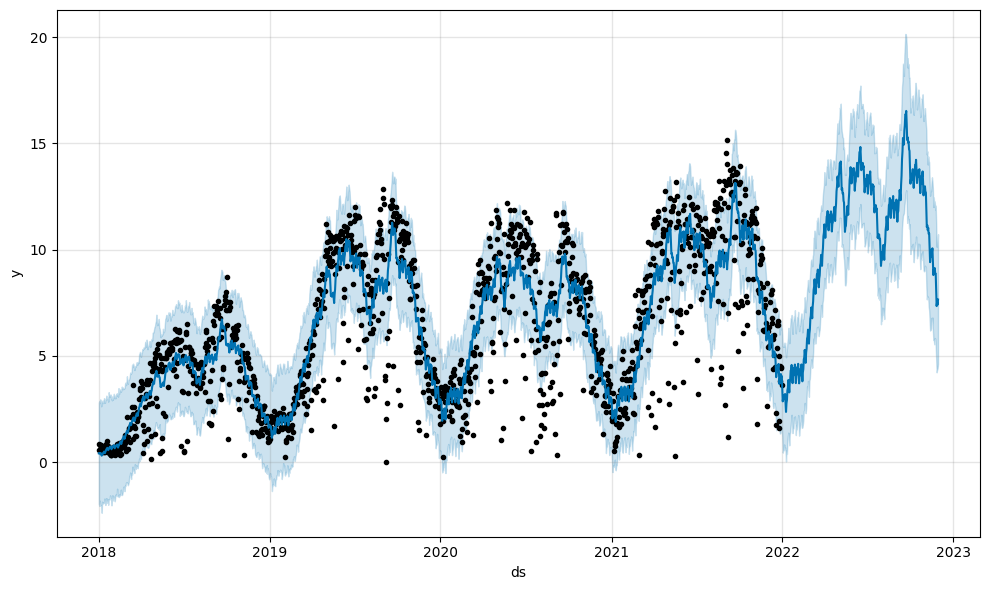

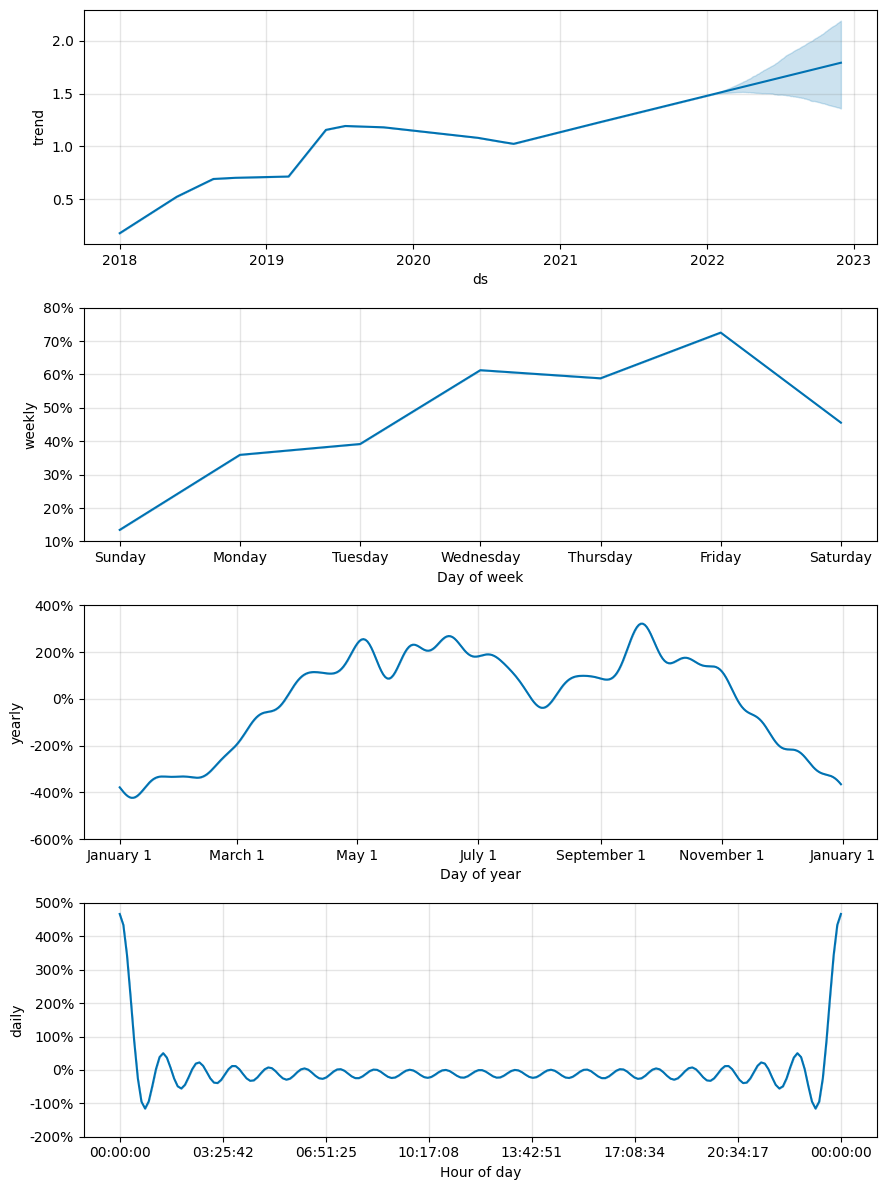

In [32]:
fig1 = m_광진구.plot(forecast0)
fig2 = m_광진구.plot_components(forecast0)

In [33]:
forecast0 = forecast0[['ds','yhat']].tail(334)
forecast1 = forecast1[['ds','yhat']].tail(334)
forecast2 = forecast2[['ds','yhat']].tail(334)
forecast3 = forecast3[['ds','yhat']].tail(334)

In [34]:
forecast0.reset_index(drop=True, inplace=True)
forecast1.reset_index(drop=True, inplace=True)
forecast2.reset_index(drop=True, inplace=True)
forecast3.reset_index(drop=True, inplace=True)

In [35]:
forecast1.drop(['ds'],axis=1,inplace=True)
forecast2.drop(['ds'],axis=1,inplace=True)
forecast3.drop(['ds'],axis=1,inplace=True)

In [36]:
result = pd.concat([forecast0,forecast1,forecast2,forecast3], axis=1)
result.columns = ['일시','광진구','동대문구','성동구','중랑구']
result.drop(['일시'], axis=1, inplace=True)

In [37]:
result

,광진구,동대문구,성동구,중랑구
0,3.496335,2.312922,2.531232,1.862489
1,2.863308,1.665488,2.211761,1.347894
2,3.042817,2.747376,2.469887,1.569669
3,2.953071,2.680586,2.384882,1.557657
4,3.167152,2.885304,2.553422,1.687018
...,...,...,...,...
329,8.151428,6.073509,5.731642,4.370828
330,7.346639,5.298462,5.342530,3.781948
331,7.535925,6.621314,5.626576,4.072732
332,7.409246,6.584969,5.526121,4.105233


In [38]:
submit = pd.read_csv('/content/drive/MyDrive/ML study/UOS/sample_submission.csv')
submit

,일시,광진구,동대문구,성동구,중랑구
0,20220101,0,0,0,0
1,20220102,0,0,0,0
2,20220103,0,0,0,0
3,20220104,0,0,0,0
4,20220105,0,0,0,0
...,...,...,...,...,...
329,20221126,0,0,0,0
330,20221127,0,0,0,0
331,20221128,0,0,0,0
332,20221129,0,0,0,0


In [39]:
submit['광진구'] = result['광진구'].round(3)
submit['동대문구'] = result['동대문구'].round(3)
submit['성동구'] = result['성동구'].round(3)
submit['중랑구'] = result['중랑구'].round(3)

In [40]:
submit

,일시,광진구,동대문구,성동구,중랑구
0,20220101,3.496,2.313,2.531,1.862
1,20220102,2.863,1.665,2.212,1.348
2,20220103,3.043,2.747,2.470,1.570
3,20220104,2.953,2.681,2.385,1.558
4,20220105,3.167,2.885,2.553,1.687
...,...,...,...,...,...
329,20221126,8.151,6.074,5.732,4.371
330,20221127,7.347,5.298,5.343,3.782
331,20221128,7.536,6.621,5.627,4.073
332,20221129,7.409,6.585,5.526,4.105


In [41]:
submit.to_csv('submit.csv', index=False)